In [1]:
using Plots
using LsqFit
using QuadGK
using Roots
include("./ring_np_num.jl")
gr()

Plots.GRBackend()

in this case we are using
$$\Delta U = a-\sqrt{2} b \sqrt{1-cos(\phi-\phi_i)}$$
as the inconvenience

In [2]:
dir = "2_player_no_inc/"
filenames = readdir(dir);

In [3]:
a_array = []
b_array = []
share_array = []
match_array = []

for filename in filenames
    result = load_sim(dir*filename)
    a = result[2].a
    b = result[2].b
    push!(a_array, a)
    push!(b_array, b)
    push!(share_array, result[1][1])
    push!(match_array, result[1][2])
end
a_array = reshape(a_array, :, 11)'
b_array = reshape(b_array, :, 11)'
share_array = reshape(share_array, 11, :)
match_array = reshape(match_array, 11, :);

In [4]:
test_result = hvcat(size(share_array)[2], share_array...);

In [5]:
heatmap(test_result, xlabel="b", ylabel="a")

In [6]:
function stufe(x, ab = [2,4])
    return Float64.(@. ab[1]<x<ab[2])
end

function simple_fitting(ϕ, p, threshold=0.5)
    places = p.>threshold
    larger_range = ϕ[places]
    if length(larger_range) == 0
        return 0, 0
    else
        return larger_range[1], larger_range[end]
    end
    end;

In [7]:
ϕ_res = 200
ϕ = LinRange(0,2π, ϕ_res+1)[1:end-1];

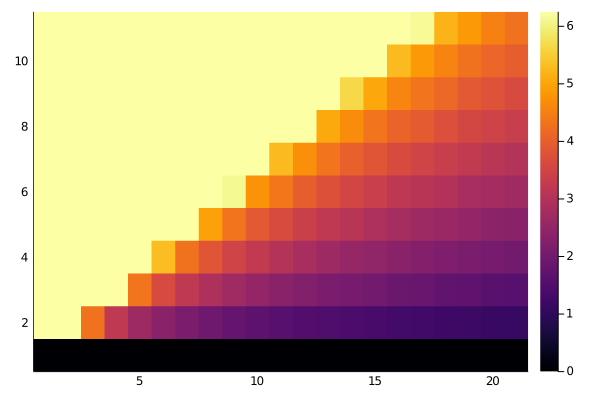

In [8]:
widths = zeros(size(share_array))
for (i, x) in enumerate(share_array)
    params = simple_fitting(ϕ, x[:,end])
    widths[i] = (params[2] - params[1])
end
widths = reshape(widths, 21, 11)'
heatmap(widths)

realising we can rescale the results to lie on top of each other when plotting the angle over $\frac{b}{a}$:

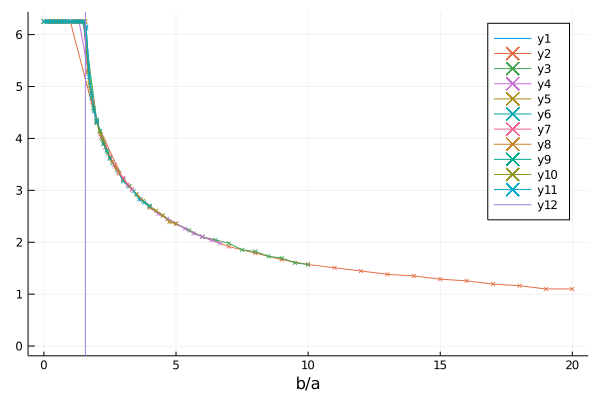

In [9]:
plot(xlabel="b/a")
for (i, y) in enumerate(eachrow(widths))
    plot!(b_array[1,:]/a_array[i,1], y, ms=2, marker=:x)
end
vline!([pi/2])

In [10]:
dir2 = "2_player_no_inc_1d/"
filenames2 = readdir(dir2);

we now embrace the rescalability and repeat the simulation with only one parameter (set $a=1$) and get:
$$\Delta U = 1-\sqrt{2} b \sqrt{1-cos(\phi-\phi_i)}$$

In [11]:
b_array_1d = []
share_array_1d = []
match_array_1d = []

for filename in filenames2
    result = load_sim(dir2*filename)
    b = result[2].b
    push!(b_array_1d, b)
    push!(share_array_1d, result[1][1])
    push!(match_array_1d, result[1][2])
end
sorted = sortperm(b_array_1d)
b_array_1d = b_array_1d[sorted]
share_array_1d = share_array_1d[sorted]
match_array_1d = match_array_1d[sorted];

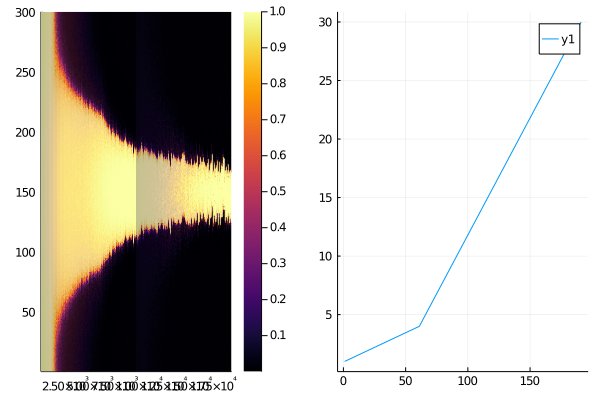

In [12]:
plot(heatmap(hcat(share_array_1d...)), plot(b_array_1d))

In [13]:
ϕ_res2 = 300
ϕ2 = LinRange(0,2π, ϕ_res2+1)[1:end-1]

widths2 = []
for x in share_array_1d
    params = simple_fitting(ϕ2, x[:,end], 0.1)
    push!(widths2, params[2]-params[1])
end

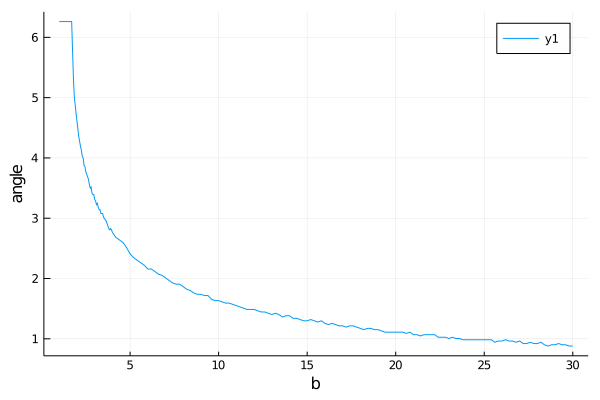

In [14]:
plot(b_array_1d, widths2, xscale=:identity, yscale=:identity, xlabel="b", ylabel="angle")
plot!()

In the case of two players, we can solve the expected utility to a certain degree. Therefore, if we plug in a step function starting at 0 and ending at $\Theta$, we get:
$$<\Delta U(\phi_i)> = a - \frac{b}{2\pi} \int_{-\phi_i}^{\Theta - \phi_i}|sin(\frac{x}{2})|- \frac{\Theta}{2\pi}c$$

in this case, we set $c=0$ as well as $a=1$ and $b\rightarrow\frac{b}{a}$, resulting in:
$$<\Delta U(\phi_i)> = 1 - \frac{b}{2\pi} \int_{-\phi_i}^{\Theta - \phi_i}|sin(\frac{x}{2})|$$

we now want to find the width of the step for a given $b$. Therefore we use, that inside the sharing regieme $<\Delta U> > 0$ holds, as well as $<\Delta U> < 0$ in the non sharing regime. If we are on the Border we get: $<\Delta U> = 0$

we can solve $\Delta U(\Theta, \phi_i, b)=0$ with $<\Delta U (\Theta, 0, b)=0$ for a given b, to get the coresponding sharing Angle.

Expressed in formula, to find the width at a given b, we need to solve the equation:
$$1 = \frac{b}{2\pi} \int_{0}^{\Theta}|sin(\frac{x}{2})|$$
for $\Theta$

In [15]:
f(Θ, ϕ, b) = 1-b/2pi * quadgk(x -> abs(sin(x/2)), -ϕ, Θ-ϕ)[1]

f (generic function with 1 method)

In [16]:
get_Θ(b) = find_zero(x->f(x, 0, b), 2)

get_Θ (generic function with 1 method)

In [17]:
Θ_array = get_Θ.(1.3:0.1:28);

In [18]:
critcal_angle = find_zero(x->f(2pi, 0, x), 2)

1.5707963267948966

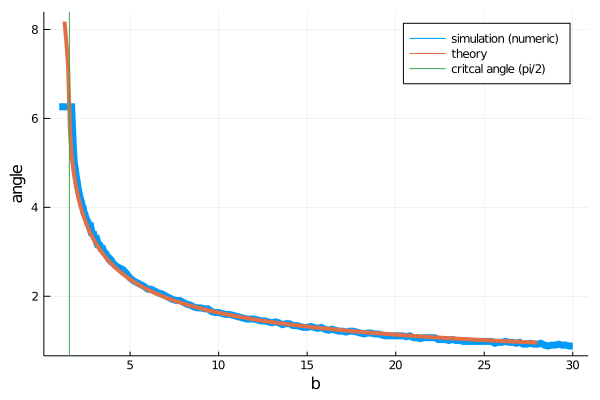

In [19]:
plot(b_array_1d, widths2, xscale=:identity, yscale=:identity, label="simulation (numeric)", width=7)
plot!(collect(1.3:0.1:28), Θ_array, label="theory", xlabel="b", ylabel="angle", width=4)
vline!([find_zero(x->f(2pi, 0, x), 2)], label="critcal angle (pi/2)")

In [20]:
test_ana = [6.2517693806436885
6.2517693806436885
6.2517693806436885
6.2517693806436885
6.2517693806436885
6.2517693806436885
6.2517693806436885
6.2517693806436885
5.717698629533423
4.775220833456486
4.335397861953915
3.989822670059037
3.7384952577718535
3.518583772020569
3.3615041393410787
3.2044245066615886
3.078760800517998
2.9530970943744057
2.8588493147667116
2.7646015351590183
2.6703537555513246
2.5761059759436304
2.5132741228718345
2.450442269800038
2.387610416728243
2.3561944901923453
2.293362637120549
2.230530784048753
2.199114857512855
2.1676989309769574
2.1048670779051615
2.1048670779051615
2.042035224833366
2.0106192982974678
1.9792033717615696
1.9477874452256714
1.9163715186897736
1.8849555921538759
1.853539665617978
1.8221237390820801
1.7907078125461822
1.7907078125461822
1.7592918860102844
1.7278759594743867
1.7278759594743867
1.6964600329384885
1.6650441064025903
1.6650441064025903
1.633628179866692
1.6022122533307943
1.6022122533307943
1.6022122533307943
1.5707963267948966
1.5393804002589986
1.5393804002589986
1.5079644737231008
1.5079644737231008
1.4765485471872029
1.4765485471872029
1.4765485471872029
1.445132620651305
1.445132620651305
1.4137166941154073
1.4137166941154073
1.4137166941154073
1.3823007675795091
1.3823007675795091
1.350884841043611
1.350884841043611
1.350884841043611
1.350884841043611
1.3194689145077128
1.3194689145077128
1.3194689145077128
1.2880529879718152
1.2880529879718152]

76-element Array{Float64,1}:
 6.2517693806436885
 6.2517693806436885
 6.2517693806436885
 6.2517693806436885
 6.2517693806436885
 6.2517693806436885
 6.2517693806436885
 6.2517693806436885
 5.717698629533423
 4.775220833456486
 4.335397861953915
 3.989822670059037
 3.7384952577718535
 ⋮
 1.4137166941154073
 1.3823007675795091
 1.3823007675795091
 1.350884841043611
 1.350884841043611
 1.350884841043611
 1.350884841043611
 1.3194689145077128
 1.3194689145077128
 1.3194689145077128
 1.2880529879718152
 1.2880529879718152

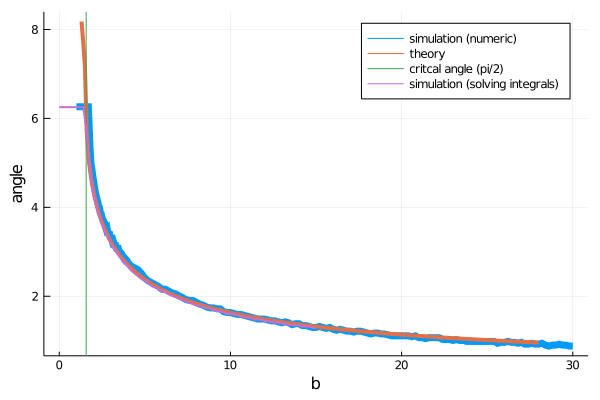

In [21]:
plot!(0:0.2:15, test_ana, width=2, label="simulation (solving integrals)")